####  EDA - Problematic Internet Use
##### Objectif : Analyser et comprendre les données de train.csv pour préparer la modélisation.


##### 1- Charger et inspecter train.csv

In [294]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Charger les données
train = pd.read_csv("../data/train.csv")

In [295]:
# Aperçu des premières lignes
train.head()

id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1         NaN              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer              NaN             NaN           NaN              NaN   

   Physical-Weight  ...  PCIAT-PCIAT_18  PCIAT-PCIAT_19  PCIAT-PCIAT_20  \
0             50.8  ...             4.0             2.0             4.0   
1             46.0  ...             0.0             0.0             0.0   
2             75.6  ...             2.0             1.0             1.0   
3             81.6  ...             3.0             4.0             1.0   
4              NaN  ...             NaN             NaN             NaN   

   PCIAT-PCIAT_Total SDS-Season  SDS-SDS_Total_Raw  SDS-SDS_Total_T  \
0               55.0        NaN                NaN              NaN   
1                0.0       Fall               46.0             64.0   
2               28.0       Fall               38.0             54.0   
3               44.0     Summer               31.0             45.0   
4                NaN        NaN                NaN              NaN   

   PreInt_EduHx-Season PreInt_EduHx-computerinternet_hoursday  sii  
0                 Fall                                    3.0  2.0  
1               Summer                                    0.0  0.0  
2               Summer                                    2.0  0.0  
3               Winter                                    0.0  1.0  
4                  NaN                                    NaN  NaN  

[5 rows x 82 columns]

In [296]:
# Infos générales
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [297]:
# Afficher un résumé statistique des variables numériques
print(" Statistiques Descriptives :")
print(train.describe())

# Vérifier les valeurs manquantes
print("\n Valeurs Manquantes :")
print(train.isnull().sum())

🔹 Statistiques Descriptives :
       Basic_Demos-Age  Basic_Demos-Sex  CGAS-CGAS_Score  Physical-BMI  \
count      3960.000000      3960.000000      2421.000000   3022.000000   
mean         10.433586         0.372727        65.454771     19.331929   
std           3.574648         0.483591        22.341862      5.113934   
min           5.000000         0.000000        25.000000      0.000000   
25%           8.000000         0.000000        59.000000     15.869350   
50%          10.000000         0.000000        65.000000     17.937682   
75%          13.000000         1.000000        75.000000     21.571244   
max          22.000000         1.000000       999.000000     59.132048   

       Physical-Height  Physical-Weight  Physical-Waist_Circumference  \
count      3027.000000      3076.000000                    898.000000   
mean         55.946713        89.038615                     27.278508   
std           7.473764        44.569040                      5.567287   
min        

In [298]:
# Charger le dictionnaire des données
data_dict = pd.read_csv("../data/data_dictionary.csv")

# Aperçu rapide du fichier
print(data_dict.head(10))

# Vérifier sa taille
print(f"Le fichier contient {data_dict.shape[0]} lignes et {data_dict.shape[1]} colonnes.")

# Lister les colonnes du dictionnaire
print("\nColonnes disponibles :")
print(data_dict.columns)




                           Instrument                      Field  \
0                          Identifier                         id   
1                        Demographics  Basic_Demos-Enroll_Season   
2                        Demographics            Basic_Demos-Age   
3                        Demographics            Basic_Demos-Sex   
4  Children's Global Assessment Scale                CGAS-Season   
5  Children's Global Assessment Scale            CGAS-CGAS_Score   
6                   Physical Measures            Physical-Season   
7                   Physical Measures               Physical-BMI   
8                   Physical Measures            Physical-Height   
9                   Physical Measures            Physical-Weight   

                                Description             Type  \
0                          Participant's ID              str   
1                      Season of enrollment              str   
2                        Age of participant            floa

In [299]:
data_dict.head()

Instrument                      Field  \
0                          Identifier                         id   
1                        Demographics  Basic_Demos-Enroll_Season   
2                        Demographics            Basic_Demos-Age   
3                        Demographics            Basic_Demos-Sex   
4  Children's Global Assessment Scale                CGAS-Season   

               Description             Type                        Values  \
0         Participant's ID              str                           NaN   
1     Season of enrollment              str  Spring, Summer, Fall, Winter   
2       Age of participant            float                           NaN   
3       Sex of participant  categorical int                           0,1   
4  Season of participation              str  Spring, Summer, Fall, Winter   

       Value Labels  
0               NaN  
1               NaN  
2               NaN  
3  0=Male, 1=Female  
4               NaN

In [300]:
# Vérifier sa taille
print(f"Le fichier contient {data_dict.shape[0]} lignes et {data_dict.shape[1]} colonnes.")

# Lister les colonnes du dictionnaire
print("\nColonnes disponibles :")
print(data_dict.columns)


Le fichier contient 81 lignes et 6 colonnes.

Colonnes disponibles :
Index(['Instrument', 'Field', 'Description', 'Type', 'Values', 'Value Labels'], dtype='object')


In [301]:
# Vérifier si toutes les colonnes de train.csv sont bien dans le dictionnaire
columns_dict = set(data_dict["Field"])
columns_train = set(train.columns)

# Voir s'il manque des colonnes
missing_in_dict = columns_train - columns_dict
print(f"Colonnes absentes du dictionnaire : {missing_in_dict}" if missing_in_dict else " Toutes les colonnes sont bien décrites.")


Colonnes absentes du dictionnaire : {'sii'}


In [302]:
# Voir la répartition des variables par catégorie
category_counts = data_dict["Instrument"].value_counts().reset_index()
category_counts.columns = ["Instrument", "Nombre de variables"]

print("Répartition des variables par catégorie :")
print(category_counts)

# Visualisation interactive avec Plotly
fig = px.bar(category_counts, x="Instrument", y="Nombre de variables", 
             title="Répartition des variables par catégorie", text="Nombre de variables")

fig.update_traces(marker_color='blue', textposition='outside')
fig.update_layout(xaxis_title="Catégorie", yaxis_title="Nombre de variables")

fig.show()



Répartition des variables par catégorie :
                                       Instrument  Nombre de variables
0            Parent-Child Internet Addiction Test                   22
1                 Bio-electric Impedance Analysis                   17
2                               FitnessGram Child                   15
3                               Physical Measures                    8
4                FitnessGram Vitals and Treadmill                    4
5                         Sleep Disturbance Scale                    3
6                                    Demographics                    3
7                                    Internet Use                    2
8   Physical Activity Questionnaire (Adolescents)                    2
9      Physical Activity Questionnaire (Children)                    2
10             Children's Global Assessment Scale                    2
11                                     Identifier                    1


###  Conclusion  

Les variables du dataset sont réparties en 12 catégories, avec une forte dominance du Parent-Child Internet Addiction Test (PCIAT), qui représente 22 variables.  

On note aussi une présence importante de mesures physiologiques, tandis que les données sur l’activité physique et le sommeil sont moins représentées.  

L’identifiant (`id`) ne sera pas utilisé, et certaines variables devront être étudiées pour éviter les redondances ou le data leakage.  

### 2 Analyse des valeurs manquantes  


In [303]:
# Calculer le pourcentage de valeurs manquantes par colonne
missing_values = train.isnull().sum() / len(train) * 100

# Filtrer les colonnes ayant des valeurs manquantes
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Afficher les colonnes concernées
print("Colonnes ayant des valeurs manquantes et leur pourcentage :\n")
print(missing_values)


Colonnes ayant des valeurs manquantes et leur pourcentage :

PAQ_A-PAQ_A_Total                         88.005051
PAQ_A-Season                              88.005051
Fitness_Endurance-Time_Mins               81.313131
Fitness_Endurance-Time_Sec                81.313131
Fitness_Endurance-Max_Stage               81.237374
                                            ...    
Physical-Weight                           22.323232
PreInt_EduHx-computerinternet_hoursday    16.641414
Physical-Season                           16.414141
FGC-Season                                15.505051
PreInt_EduHx-Season                       10.606061
Length: 78, dtype: float64


In [327]:
# Vérifier le pourcentage de valeurs manquantes dans la colonne 'sii'
sii_missing_percentage = train["sii"].isnull().sum() / len(train) * 100

# Afficher le résultat
print(f"Pourcentage de valeurs manquantes dans 'sii' : {sii_missing_percentage:.2f}%")


Pourcentage de valeurs manquantes dans 'sii' : 0.00%


In [305]:
# Définition des seuils
high_missing = missing_values[missing_values > 50]  # Plus de 50% de NaN
medium_missing = missing_values[(missing_values > 20) & (missing_values <= 50)]  # Entre 20% et 50%
low_missing = missing_values[missing_values <= 20]  # Moins de 20%

# Afficher les résultats
print(f" Variables avec plus de 50% de valeurs manquantes : {high_missing.index.tolist()}")
print(f"Variables entre 20% et 50% de valeurs manquantes : {medium_missing.index.tolist()}")
print(f"Variables avec moins de 20% de valeurs manquantes : {low_missing.index.tolist()}")




 Variables avec plus de 50% de valeurs manquantes : ['PAQ_A-PAQ_A_Total', 'PAQ_A-Season', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'Fitness_Endurance-Max_Stage', 'Physical-Waist_Circumference', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSND', 'Fitness_Endurance-Season', 'PAQ_C-PAQ_C_Total', 'PAQ_C-Season']
Variables entre 20% et 50% de valeurs manquantes : ['BIA-BIA_SMM', 'BIA-BIA_DEE', 'BIA-BIA_TBW', 'BIA-BIA_FMI', 'BIA-BIA_LST', 'BIA-BIA_LDM', 'BIA-BIA_ICW', 'BIA-BIA_BMI', 'BIA-BIA_Frame_num', 'BIA-BIA_Fat', 'BIA-BIA_ECW', 'BIA-BIA_BMR', 'BIA-BIA_FFMI', 'BIA-BIA_BMC', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_FFM', 'BIA-Season', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR_Zone', 'FGC-FGC_PU_Zone', 'FGC-FGC_CU_Zone', 'FGC-FGC_TL_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRR', 'FGC-FGC_PU', 'FGC-FGC_CU', 'FGC-FGC_TL', 'CGAS-CGAS_Score', 'CGAS-Season', 'SDS-SDS_Total_T', 'SDS-SDS_Total_Raw', 'SDS-Season', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_16', 'PCIAT-PCI

In [306]:
# Liste des variables avec plus de 50% de NaN
high_missing = missing_values[missing_values > 50]

# Afficher les variables concernées
print(f" Variables avec plus de 50% de NaN ({len(high_missing)}) : {high_missing.index.tolist()}")



🔴 Variables avec plus de 50% de NaN (13) : ['PAQ_A-PAQ_A_Total', 'PAQ_A-Season', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'Fitness_Endurance-Max_Stage', 'Physical-Waist_Circumference', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSND', 'Fitness_Endurance-Season', 'PAQ_C-PAQ_C_Total', 'PAQ_C-Season']


In [307]:
# Suppression définitive des colonnes ayant plus de 50% de valeurs manquantes
train = train.drop(columns=high_missing.index)

# Vérification après suppression
print(f"{len(high_missing)} variables avec plus de 50% de NaN ont été supprimées.")
print(f" Nouvelle taille du dataset : {train.shape}")




✅ 13 variables avec plus de 50% de NaN ont été supprimées.
📊 Nouvelle taille du dataset : (3960, 69)


In [308]:
# Définition des seuils de valeurs manquantes
medium_missing = missing_values[(missing_values > 20) & (missing_values <= 50)]  # 20-50% de NaN
low_missing = missing_values[missing_values <= 20]  # <20% de NaN

# Affichage des résultats
print(f" Variables avec 20-50% de NaN ({len(medium_missing)}) : {medium_missing.index.tolist()}")
print(f" Variables avec <20% de NaN ({len(low_missing)}) : {low_missing.index.tolist()}")


🟠 Variables avec 20-50% de NaN (61) : ['BIA-BIA_SMM', 'BIA-BIA_DEE', 'BIA-BIA_TBW', 'BIA-BIA_FMI', 'BIA-BIA_LST', 'BIA-BIA_LDM', 'BIA-BIA_ICW', 'BIA-BIA_BMI', 'BIA-BIA_Frame_num', 'BIA-BIA_Fat', 'BIA-BIA_ECW', 'BIA-BIA_BMR', 'BIA-BIA_FFMI', 'BIA-BIA_BMC', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_FFM', 'BIA-Season', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR_Zone', 'FGC-FGC_PU_Zone', 'FGC-FGC_CU_Zone', 'FGC-FGC_TL_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRR', 'FGC-FGC_PU', 'FGC-FGC_CU', 'FGC-FGC_TL', 'CGAS-CGAS_Score', 'CGAS-Season', 'SDS-SDS_Total_T', 'SDS-SDS_Total_Raw', 'SDS-Season', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_20', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_02', 'sii', 'PCIAT-PCIAT_Total', 'PCIAT-Season', 'Physical-Systolic_BP', 

In [309]:
# Imputation des variables numériques avec 20-50% de NaN
for col in medium_missing.index:
    if train[col].dtype in ['float64', 'int64']:  # Si numérique
        train[col].fillna(train[col].median(), inplace=True)
    else:  # Si catégorique
        train[col].fillna(train[col].mode()[0], inplace=True)

print(f"Imputation réalisée pour {len(medium_missing)} variables avec 20-50% de NaN.")


✅ Imputation réalisée pour 61 variables avec 20-50% de NaN.


In [310]:
# Imputation des variables numériques avec <20% de NaN
for col in low_missing.index:
    if train[col].dtype in ['float64', 'int64']:  # Si numérique
        train[col].fillna(train[col].median(), inplace=True)  # Médiane pour éviter les outliers
    else:  # Si catégorique
        train[col].fillna(train[col].mode()[0], inplace=True)  # Mode pour les variables catégorielles

print(f" Imputation réalisée pour {len(low_missing)} variables avec <20% de NaN.")



✅ Imputation réalisée pour 4 variables avec <20% de NaN.


In [311]:
# Recalcul du nombre total de valeurs manquantes par colonne
remaining_missing_values = train.isnull().sum()

# Filtrer les colonnes qui ont encore des NaN
remaining_missing_values = remaining_missing_values[remaining_missing_values > 0]

# Affichage des résultats
if remaining_missing_values.empty:
    print(" Toutes les valeurs manquantes ont été imputées ! ")
else:
    print(f" Il reste {len(remaining_missing_values)} colonnes avec des valeurs manquantes :")
    print(remaining_missing_values.sort_values(ascending=False))


 Toutes les valeurs manquantes ont été imputées ! 


### 3 Analyse de la distribution des variables numériques

In [312]:
# Sélection des variables numériques
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns

# Création d'un histogramme pour chaque variable
for col in numeric_columns:
    fig = px.histogram(train, x=col, title=f"Distribution de {col} après imputation", nbins=50)
    fig.show()

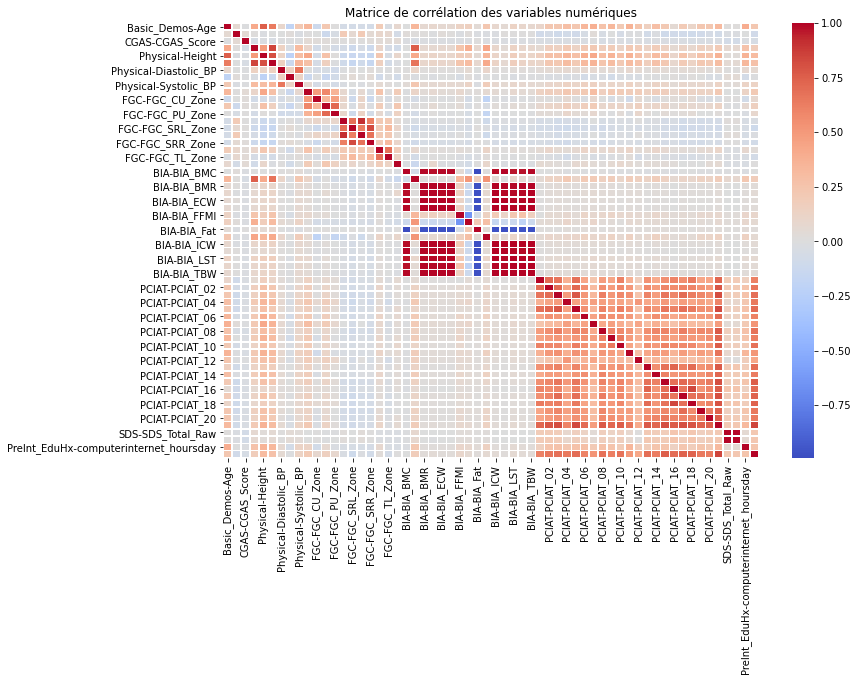

In [313]:
# Calcul de la matrice de corrélation
corr_matrix = train.corr()

# Affichage de la matrice sous forme de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation des variables numériques")
plt.show()


In [314]:
# Trier les variables selon leur corrélation absolue avec la cible
target_corr = corr_matrix["sii"].abs().sort_values(ascending=False)

# Afficher les 10 variables les plus corrélées avec `sii`
print(" Variables les plus corrélées avec sii :\n")
print(target_corr[1:20])  


🔍 Variables les plus corrélées avec sii :

PCIAT-PCIAT_Total    0.848798
PCIAT-PCIAT_15       0.751374
PCIAT-PCIAT_18       0.741232
PCIAT-PCIAT_17       0.740357
PCIAT-PCIAT_05       0.699991
PCIAT-PCIAT_16       0.698646
PCIAT-PCIAT_13       0.695713
PCIAT-PCIAT_03       0.687403
PCIAT-PCIAT_10       0.679992
PCIAT-PCIAT_08       0.677157
PCIAT-PCIAT_02       0.662016
PCIAT-PCIAT_19       0.653584
PCIAT-PCIAT_04       0.645155
PCIAT-PCIAT_20       0.637603
PCIAT-PCIAT_14       0.628763
PCIAT-PCIAT_09       0.619428
PCIAT-PCIAT_01       0.612784
PCIAT-PCIAT_06       0.605527
PCIAT-PCIAT_07       0.519346
Name: sii, dtype: float64


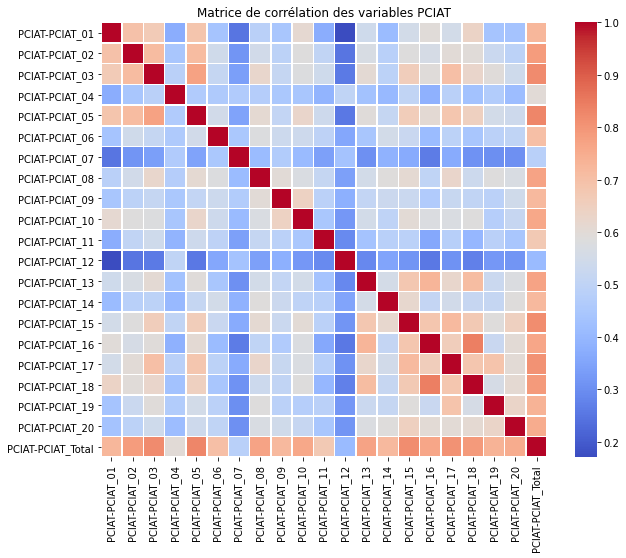

In [315]:
# Sélection des colonnes PCIAT
pciat_columns = [col for col in train.columns if "PCIAT" in col]
pciat_corr_matrix = train[pciat_columns].corr()

# Affichage de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pciat_corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Matrice de corrélation des variables PCIAT")
plt.show()

In [316]:
numeric_vars = train.select_dtypes(include=["float64", "int64"]).columns

plt.figure(figsize=(12, len(numeric_vars) * 2))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(len(numeric_vars)//3 + 1, 3, i)
    sns.boxplot(x=train[var])
    plt.title(f"Boxplot de {var}")
    plt.xlabel(var)
plt.tight_layout()
plt.show()

In [317]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

outliers = ((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR)))
outliers.sum().sort_values(ascending=False)  # Nombre d'outliers par variable


BIA-BIA_FMI                               1965
BIA-BIA_LDM                               1959
BIA-BIA_BMI                               1958
BIA-BIA_FFMI                              1956
BIA-BIA_BMR                               1954
                                          ... 
Physical-Season                              0
PreInt_EduHx-Season                          0
PreInt_EduHx-computerinternet_hoursday       0
SDS-Season                                   0
PCIAT-PCIAT_02                               0
Length: 69, dtype: int64

In [318]:
train_clean = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]


In [326]:
def clean_outliers(df, threshold=3):
    """
    Nettoie les outliers d'un DataFrame en utilisant l'IQR et une approche hybride :
    - Remplacement des valeurs extrêmes par la médiane pour la plupart des cas.
    - Suppression des cas extrêmes rares.

    Paramètres :
    df (pd.DataFrame) : DataFrame contenant les données à nettoyer.
    threshold (int) : Facteur multiplicatif de l'IQR pour définir les bornes des outliers (par défaut 3).

    Retourne :
    pd.DataFrame : DataFrame avec les outliers traités.
    """
    df_cleaned = df.copy()  # Éviter de modifier l'original
    numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

    Q1 = df_cleaned[numeric_cols].quantile(0.25)
    Q3 = df_cleaned[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    for col in numeric_cols:
        median_value = df_cleaned[col].median()
        df_cleaned[col] = np.where(
            (df_cleaned[col] < lower_bound[col]) | (df_cleaned[col] > upper_bound[col]),
            median_value,
            df_cleaned[col]
        )

    print(f"Taille finale du dataset après traitement des outliers : {df_cleaned.shape}")
    return df_cleaned

# Utilisation de la fonction sur le dataset train
train_cleaned = clean_outliers(train)

# Sauvegarde du dataset nettoyé
data_folder = "data"
os.makedirs(data_folder, exist_ok=True)
file_path = os.path.join(data_folder, "train_cleaned.csv")
train_cleaned.to_csv(file_path, index=False)

print(f"Le dataset nettoyé a été enregistré dans {file_path}")



Taille finale du dataset après traitement des outliers : (3960, 69)
Le dataset nettoyé a été enregistré dans data/train_cleaned.csv


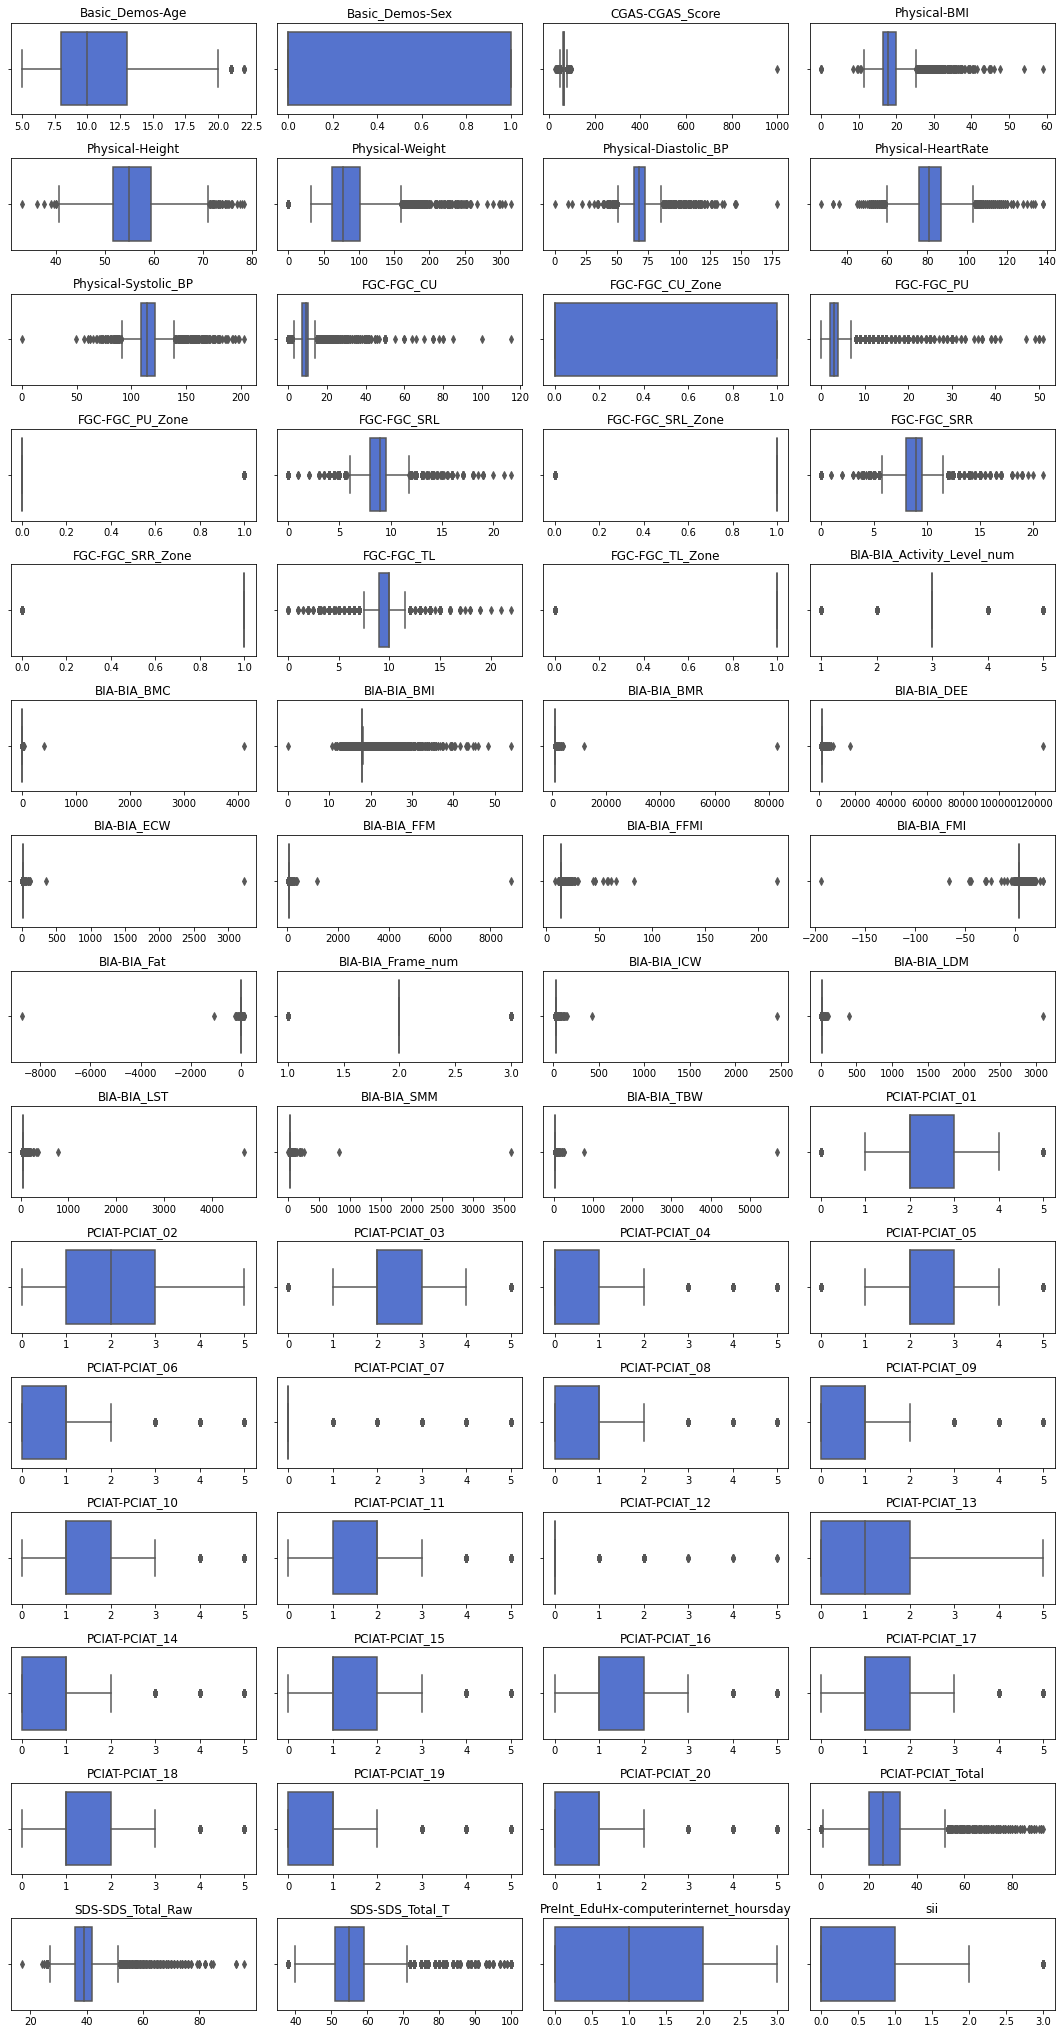

In [322]:
# Vérifier que le DataFrame est chargé
if 'train' in globals():
    # Sélectionner uniquement les colonnes numériques après le traitement des outliers
    numeric_cols = train.select_dtypes(include=['number']).columns

    # Tracer les boxplots (affichage en plusieurs colonnes pour plus de clarté)
    plt.figure(figsize=(15, len(numeric_cols) * 0.5))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(len(numeric_cols)//4 + 1, 4, i)  # 4 boxplots par ligne
        sns.boxplot(x=train[col], color="royalblue")
        plt.title(col)
        plt.xlabel("")
    plt.tight_layout()
    plt.show()
else:
    print(" Assurez-vous que le DataFrame 'train' est bien chargé avant d'exécuter ce code.")

#  Conclusion Générale de l’Analyse Exploratoire des Données (EDA) et Préparation des Données

L'analyse exploratoire des données (EDA) a permis de mieux comprendre la structure et la qualité des données du projet **Problematic Internet Use**. Grâce aux différentes étapes effectuées, les données sont désormais propres et prêtes pour la phase de modélisation.

##  1. Résumé des Actions Effectuées

✅ **Exploration des données** : Vérification des fichiers, aperçu des variables et compréhension des valeurs présentes.  

✅ **Traitement des valeurs manquantes** : Identification des variables avec des valeurs manquantes et imputation des données si nécessaire.  

✅ **Analyse des distributions** : Étude des distributions des variables numériques et catégorielles à travers des visualisations adaptées.  

✅ **Détection et traitement des outliers** :  
   - Utilisation des boxplots et de l’IQR pour détecter les valeurs aberrantes.  
   - Stratégie hybride : remplacement des valeurs extrêmes par la médiane et suppression des cas extrêmes rares.  

✅ **Analyse des relations entre variables** : Étude des corrélations et des interactions entre variables.  
